In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Galle_Arima_model.csv",parse_dates=['Month'],index_col=['Month'])

In [3]:
df.head()

,Production/kg
Month,
2016-01-01,3684849
2016-02-01,3228301
2016-03-01,3194042
2016-04-01,3370155
2016-05-01,3916009


In [5]:
ts=df['Production/kg'].resample('MS').sum()

In [6]:
ts.head()

Month
2016-01-01    3684849
2016-02-01    3228301
2016-03-01    3194042
2016-04-01    3370155
2016-05-01    3916009
Freq: MS, Name: Production/kg, dtype: int64

<Axes: xlabel='Month'>

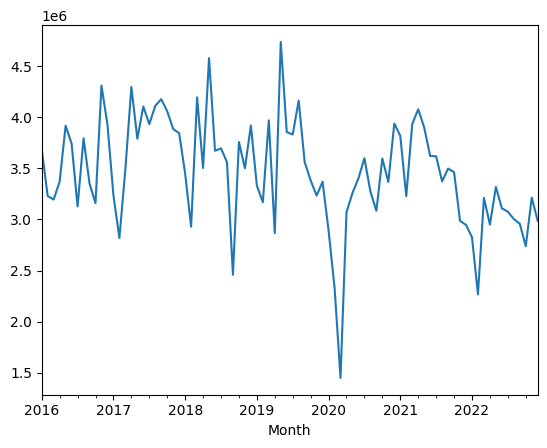

In [7]:
ts.plot()

In [8]:
import statsmodels.api as sm

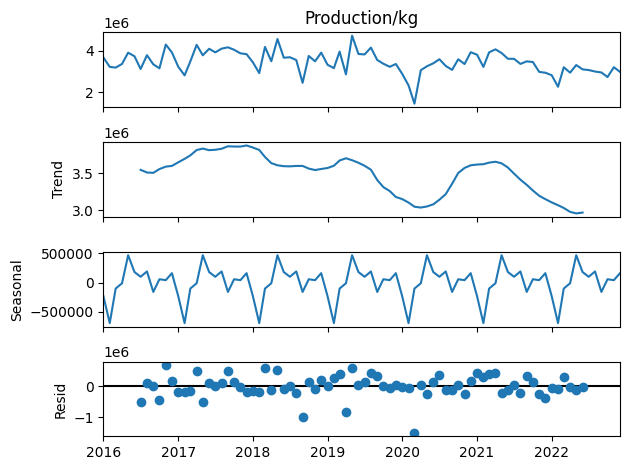

In [9]:
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
addtest=adfuller(ts)

In [12]:
print('pvalue of adfuller test is: ',addtest[1])

pvalue of adfuller test is:  0.003028679343712455


In [13]:
len(ts)

84

In [14]:
train=ts[:64]
test=ts[64:]

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(train, order=(1, 0, 1)).fit()


In [50]:
pred=model.predict(start=len(train),end=(len(ts)-1))

In [18]:
len(train),(len(ts)-1)

(64, 83)

In [19]:
pred.head()

2021-05-01    3.722067e+06
2021-06-01    3.662289e+06
2021-07-01    3.623855e+06
2021-08-01    3.599145e+06
2021-09-01    3.583258e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [20]:
from sklearn.metrics import mean_squared_error

In [51]:
error=np.sqrt(mean_squared_error(test,pred))
error

457142.8630413834

In [52]:
mape1 = np.mean(np.abs((test - pred) / test)) * 100


In [54]:
print(f'Mean Absolute Percentage Error (MAPE): {mape1:.2f}%')


Mean Absolute Percentage Error (MAPE): 12.86%


In [22]:
test.mean(),np.sqrt(test.var())

(3152347.35, 367107.2810871324)

<Axes: xlabel='Month'>

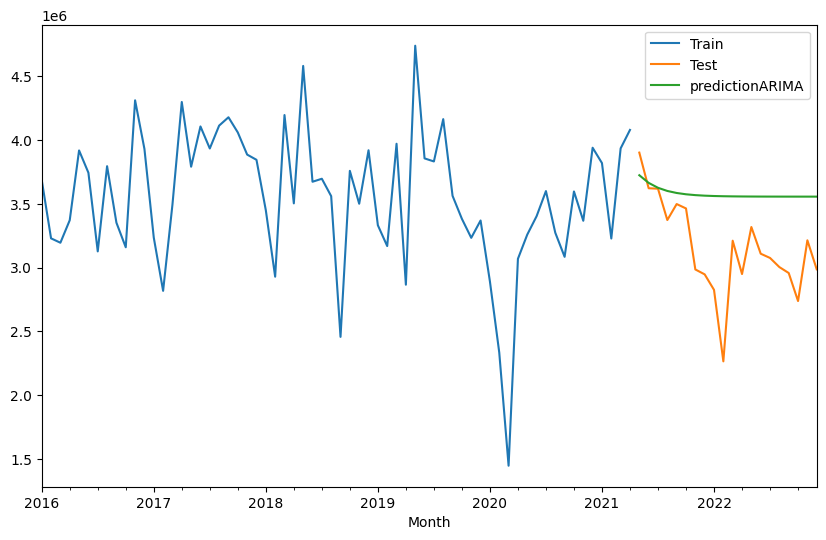

In [23]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='predictionARIMA')

In [24]:
final_model=ARIMA(ts,order=(1,0,1)).fit()

In [25]:
prediction=final_model.predict(len(ts),len(ts)+6)

<Axes: xlabel='Month'>

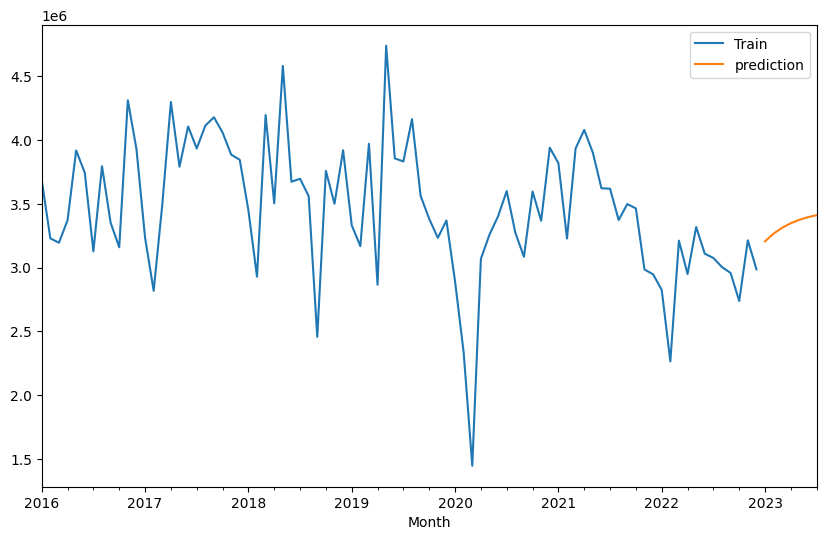

In [26]:
ts.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True,label='prediction')

In [27]:
import itertools

In [28]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [29]:
pdq_combination=list(itertools.product(p,d,q))

In [30]:
len(pdq_combination)

128

In [31]:
rmse=[]
order1=[]

In [32]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting M

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

In [35]:
results.to_csv('GALLE_ARIMA_result.csv')

In [36]:
mse = mean_squared_error(test, pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 249407414984.85236


In [38]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model1 = ARIMA(train, order=(6, 1, 4)).fit()


In [40]:
pred1=model1.predict(start=len(train),end=(len(ts)-1))

In [41]:
pred1.head()

2021-05-01    4.008645e+06
2021-06-01    3.779723e+06
2021-07-01    3.697543e+06
2021-08-01    3.734455e+06
2021-09-01    3.598021e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [42]:
pred1.tail()

2022-08-01    3.368799e+06
2022-09-01    3.433357e+06
2022-10-01    3.416823e+06
2022-11-01    3.360921e+06
2022-12-01    3.404658e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [43]:
error1=np.sqrt(mean_squared_error(test,pred1))
error1

457142.8630413834

<Axes: xlabel='Month'>

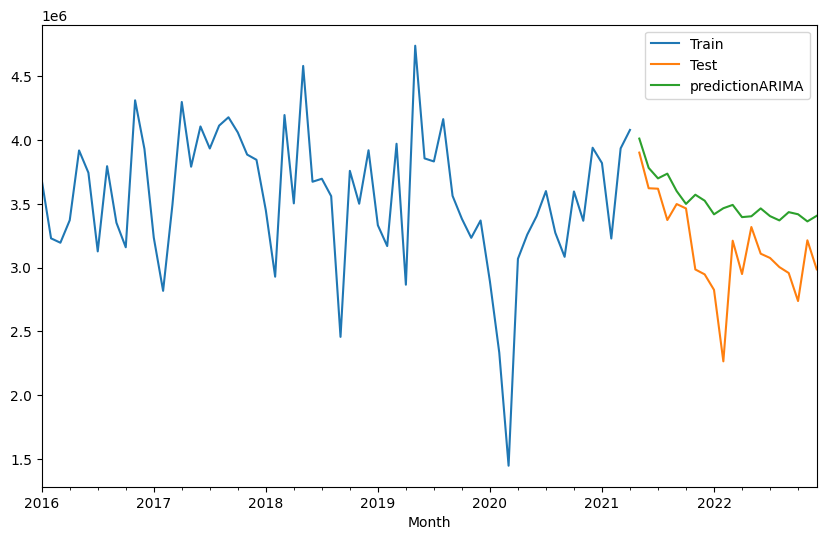

In [44]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred1.plot(legend=True,label='predictionARIMA')

In [45]:
mape = np.mean(np.abs((test - pred1) / test)) * 100


In [46]:
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 12.86%
